In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def get_file_data(csv, pos):
    csvf = open(csv, 'r')
    csvflines = csvf.readlines()
    csvf.close()
    
    data = []    
    for line in csvflines[1:]:
        values =  line.strip('\n[]').split(',')
        data.append(float(values[pos]))
        
    return data

['../FinalEnv01/test-03/', '../FinalEnv02/test-03/', './test-03/']
['../FinalEnv01/test-02/', '../FinalEnv02/test-02/', './test-02/']
['../FinalEnv01/test-01/', '../FinalEnv02/test-01/', './test-01/']


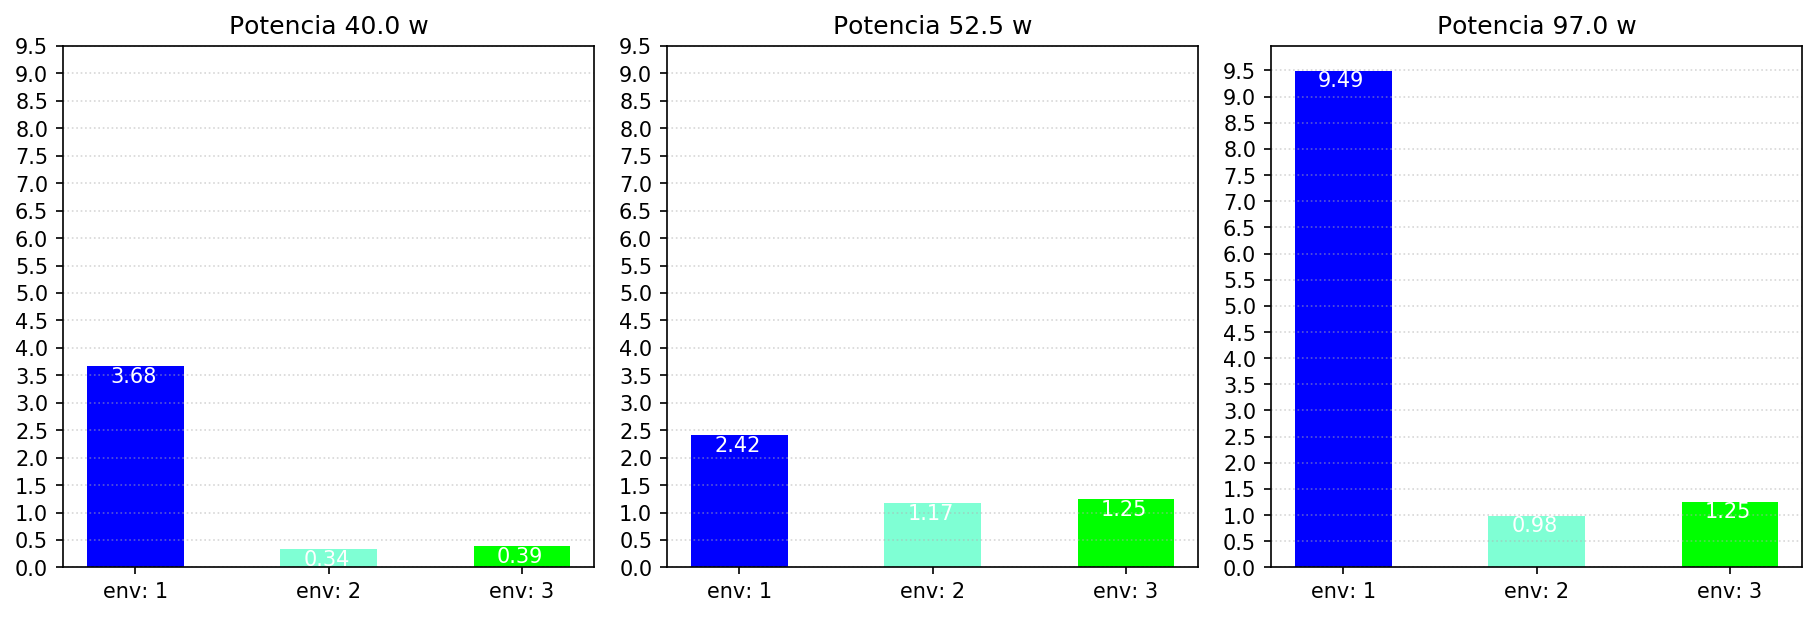

In [24]:
##############################
### POWER CUMULATIVE ERROR ###
##############################
key = 'power'
clr = 'blue'
pos = 8
targets = [97.0, 40.0, 52.5]
tgtlbl = [40.0, 52.5, 97.0]
X = [1,2,3]
Yticks = np.arange(0, 9.51, 0.50)
count = 75

pathsb = [[],[],[]]
pathsb[1] = ['../FinalEnv01/test-02/', '../FinalEnv02/test-02/', './test-02/']
pathsb[2] = ['../FinalEnv01/test-01/', '../FinalEnv02/test-01/', './test-01/']
pathsb[0] = ['../FinalEnv01/test-03/', '../FinalEnv02/test-03/', './test-03/']
clrs  = ['blue', 'aquamarine', 'lime']
labels = [f'env: {i}' for i in [1,2,3]]
chkpt = 5

fig, axs = plt.subplots(1, 3, figsize=(12,4), dpi=150, constrained_layout=True)


for i, (paths, target) in enumerate(zip(pathsb, targets)):
    ax = axs[i - 1]
    ax.set_title(f"Potencia {tgtlbl[i - 1]} w")
    
    graph = []
    print(paths)
    for path in paths:
        bundle = []
        for it in range(15):
            data = get_file_data(path + f'checkpoint-{chkpt}/iter-{it}.csv', pos)
            bundle.append([ abs(x - target) for x in data ])
            
        bundle = np.array(bundle)
        values = bundle.mean(axis = 0)
        graph.append( np.array(values[count:]).mean() )
        
    ax.bar(
        X, graph,
        color = clrs,
        linestyle = '-',
        width = 0.50,
        alpha = 1.0
    )
    
    ax.set_xticks(X)
    ax.set_xticklabels(labels)
    
    ax.set_yticks(Yticks)
    
    ax.grid(
        alpha = 0.50,
        axis = 'y',
        linestyle = ':'
    )
    
    for index, value in enumerate(graph):
        ax.text(index + 0.87, value - 0.30, "{:.2f}".format(value), color = 'white')

# ax.set_ylabel(f'Error medio acumulado desde el paso {count}')

plt.savefig(f'./img/{key}.error.mean.cum.png', bbox_inches='tight')